In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML

### Go to the main package directory (```brownian_manifold```) using the magic command: 
####  ```%cd  ../brownian-manifold/brownian_manifold```
####  for example in my case (using a linux distribution):

In [2]:
%cd ~/Documents/brownian-manifold/brownian_manifold

/home/hbesser/Documents/brownian-manifold/brownian_manifold


lets really make sure we are in the brownian-manifold directory

In [3]:
%pwd

'/home/hbesser/Documents/brownian-manifold/brownian_manifold'

Now lets import ```Manifold``` :

In [4]:
from manifold import Manifold

## Create a Manifold object

#### Lets first look at ```Manifold``` documentation with the inline help (i.e. type ```Manifold?``` in the cell)
- Note: the ```Manifold?``` command is a great way to read general ```Manifold``` functionality used throughout this notebook

A window will pop-up with all the documentation of the Class:

In [5]:
Manifold?

### For the first part of the notebook let's work with a 2-sphere manifold

Invoke ```Manifold``` and instantiate ```sphere_manifold``` (or whatever you would like to name an instance of ```Manifold```)

In [6]:
# specify the inital paramters
sphere_manifold= Manifold(manifold='sphere', radius_sphere=1, final_time=20, n_steps=150000)

### Ok now the have created a  ```sphere_manifold``` (or whatever you named it) instance of ```Manifold```. Let's inspect the object.
- ```type sphere_manifold.``` then the ```tab``` key on your keyboard to see the attributes and methods

first lets just see the inital attributes that we assigned to the instance:

In [7]:
print(sphere_manifold.manifold)
print(sphere_manifold.radius_sphere)
print(sphere_manifold.final_time)
print(sphere_manifold.n_steps)

#self.step_size should equal self.final_time/self.n_steps
print(sphere_manifold.step_size)

sphere
1
20.0
150000
0.00013333333333333334


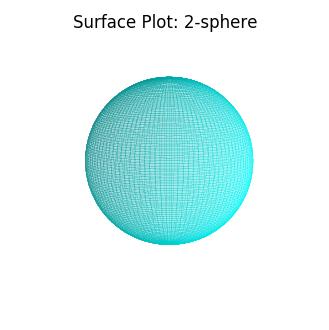

In [8]:
sphere_surface_data = sphere_manifold.get_sphere(plot=True)

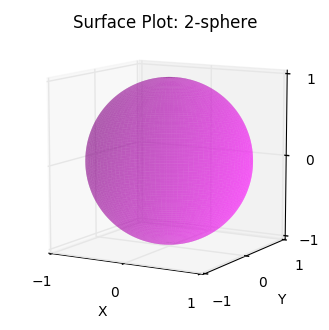

In [9]:
sphere_manifold.plot_sphere(sphere_surface_data, color='magenta', alpha=0.4, antialiased=True, show_axes=True)

In [10]:
sphere_simdata = sphere_manifold.simulate_brownian_sphere()

In [11]:
data_sphere = pd.DataFrame({'Step Number': np.arange(1,sphere_manifold.n_steps+1),
                            'X' : sphere_simdata[:,0],
                            'Y' : sphere_simdata[:,1],
                            'Z' : sphere_simdata[:,2]})
df = pd.DataFrame(data_sphere)  

In [12]:
def hover(hover_color="#ffff99"):
    return dict(selector="tr:hover",
                props=[("background-color", "%s" % hover_color)])

styles = [
    hover(),
    dict(selector="th", props=[("font-size", "80%"),
                               ("text-align", "center")]),
    dict(selector="caption", props=[("caption-side", "bottom")])
]
html = (df.tail(15).style.set_table_styles(styles)
          .set_caption("Sucess: Rotated back to the pole! (and tiny steps)"))
html

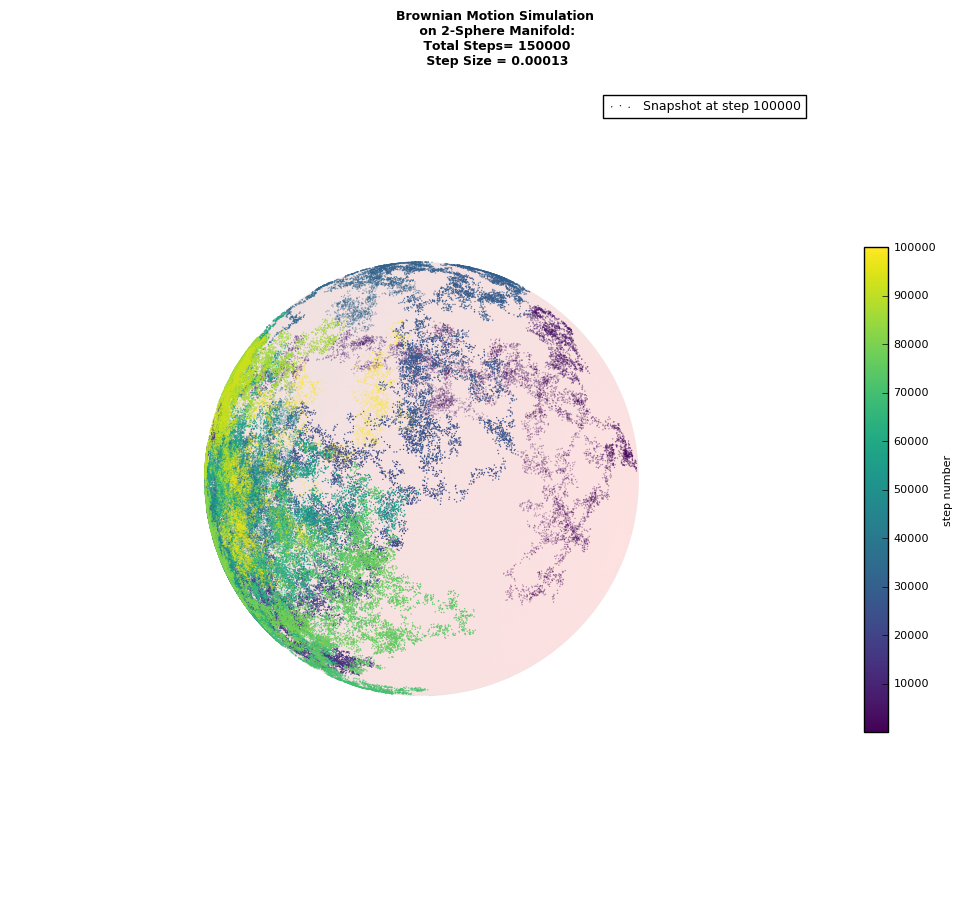

In [13]:
sphere_manifold.plot_brownian_sphere(sphere_simdata,steptoplot=[100000])

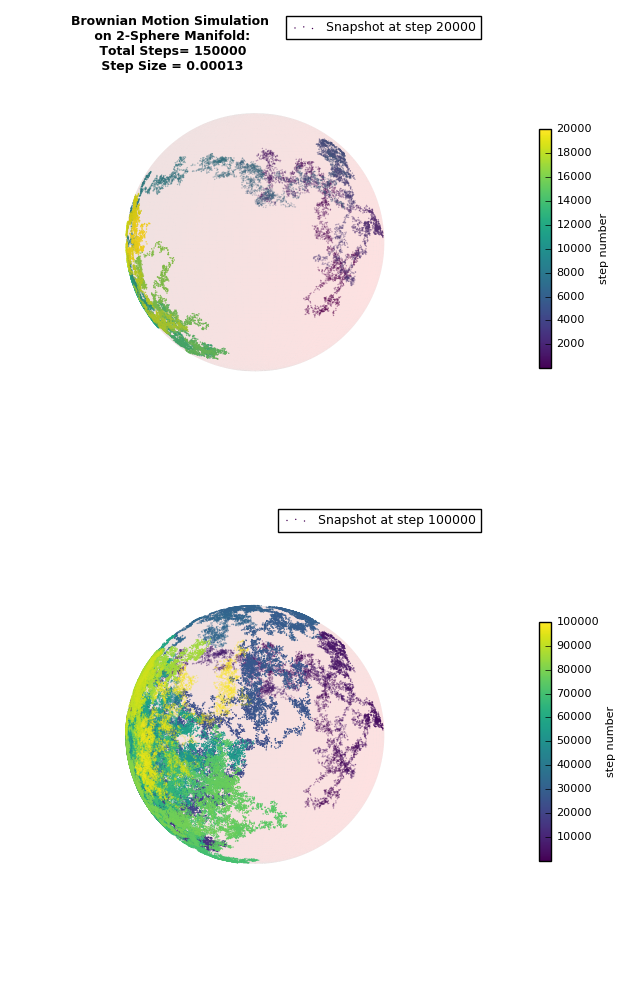

In [14]:
sphere_manifold.plot_brownian_sphere(sphere_simdata,steptoplot=[20000,100000])

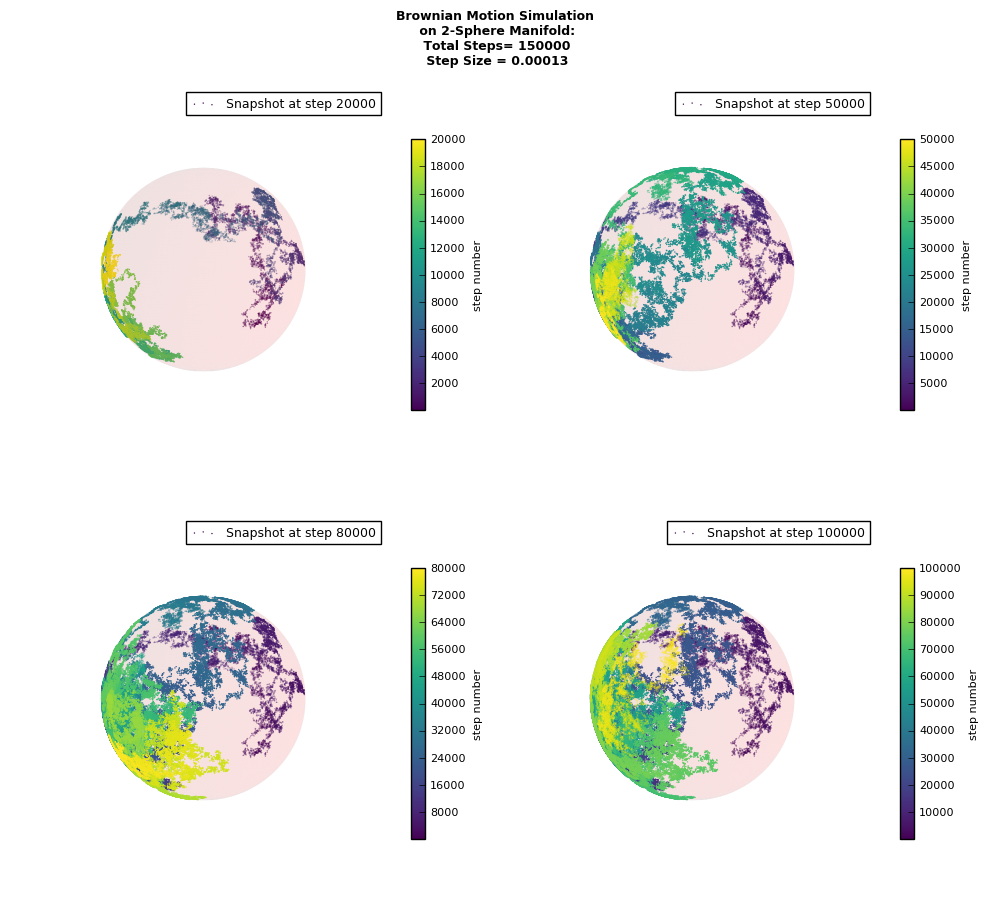

In [15]:
sphere_manifold.plot_brownian_sphere(sphere_simdata,steptoplot=[20000,50000,80000,100000])

In [ ]:
sphere_manifold.plot_sphere(sphere_surface_data,manifold="cylinder", color='magenta',\
                            alpha=0.4, antialiased=True, show_axes=True)